<h1>
<center><img src="./lite_no_back.png" width = 80 height= 80/>
<b>Nefarious </h1></b> </center>

---
# Introduction To OpenAI Gym - CartPole 
---



### About OpenAI-gym

<em>OpenAI is a non-profit research company that is focussed on building out AI in a way that is good for everybody.
It was founded by Elon Musk and Sam Altman.
OpenAI’s mission as stated on their website is to “build safe AGI, 
and ensure AGI’s benefits are as widely and evenly distributed as possible”.</em>

Requirements
<br>
``
numpy
gym
matplotlib``

Resources 
<br>
* https://gym.openai.com/docs/


### Installation
```shell
sudo apt-get update
pip install gym
pip install -e .[all]

pip install matplotlib
pip install numpy
```

## Imports 

In [3]:
import random
import gym
import numpy as np

import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')


---

<b>Some Environments Example </b>
* CartPole-v1  
* MountainCar-v0
* MsPacman-v0 

In [14]:
# Lets Conduct a test Run 

env = gym.make('CartPole-v0')
for i_episode in range(1): # number of episodes
    observation = env.reset()
    for t in range(400): # number of iterations within the episodes
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
#         if done:
#             print("Episode finished after {} timesteps".format(t+1))
#             break
env.close()


WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


In [16]:
print(f"actions space : {env.action_space}")
print(f"observation space : {env.observation_space}")
print(f"Max value of observation space : {env.observation_space.low}")

# [position of cart, velocity of cart, angle of pole, rotation rate of pole]

actions space : Discrete(2)
observation space : Box(4,)
Max value of observation space : [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [28]:
env = gym.make('CartPole-v0')
a = []
for i_episode in range(1): # number of episodes
    observation = env.reset()
    for t in range(500): # number of iterations within the episodes
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(t%2)
        a.append(observation)
#         if done:
#             print("Episode finished after {} timesteps".format(t+1))
#             break
env.close()

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


In [29]:
b = np.matrix(a)

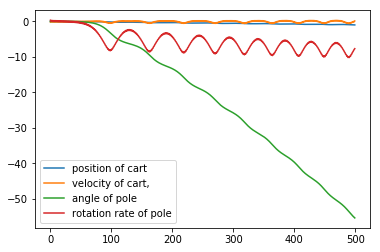

In [30]:
plt.plot(b[:,0],label="position of cart")
plt.plot(b[:,1],label="velocity of cart,")
plt.plot(b[:,2],label="angle of pole")
plt.plot(b[:,3],label="rotation rate of pole")
plt.legend()
plt.show()

## <center> THE END </center>

In [ ]:
## Constants

Resource : 
* https://github.com/adibyte95/CartPole-OpenAI-GYM
* https://keon.io/deep-q-learning/
    
    
ENV_NAME = "CartPole-v1"

GAMMA = 0.95
LEARNING_RATE = 0.001

MEMORY_SIZE = 1000000
BATCH_SIZE = 20

EXPLORATION_MAX = 1.0
EXPLORATION_MIN = 0.01
EXPLORATION_DECAY = 0.995




class DQNSolver:

    def __init__(self, observation_space, action_space):
        self.exploration_rate = EXPLORATION_MAX

        self.action_space = action_space
        self.memory = deque(maxlen=MEMORY_SIZE)

        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=LEARNING_RATE))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.action_space)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def experience_replay(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        for state, action, reward, state_next, terminal in batch:
            q_update = reward
            if not terminal:
                q_update = (reward + GAMMA * np.amax(self.model.predict(state_next)[0]))
            q_values = self.model.predict(state)
            q_values[0][action] = q_update
            self.model.fit(state, q_values, verbose=0)
        self.exploration_rate *= EXPLORATION_DECAY
        self.exploration_rate = max(EXPLORATION_MIN, self.exploration_rate)


def cartpole():
    env = gym.make(ENV_NAME)
    score_logger = ScoreLogger(ENV_NAME)
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    dqn_solver = DQNSolver(observation_space, action_space)
    run = 0
    while True:
        run += 1
        state = env.reset()
        state = np.reshape(state, [1, observation_space])
        step = 0
        while True:
            step += 1
            #env.render()
            action = dqn_solver.act(state)
            state_next, reward, terminal, info = env.step(action)
            reward = reward if not terminal else -reward
            state_next = np.reshape(state_next, [1, observation_space])
            dqn_solver.remember(state, action, reward, state_next, terminal)
            state = state_next
            if terminal:
                print "Run: " + str(run) + ", exploration: " + str(dqn_solver.exploration_rate) + ", score: " + str(step)
                score_logger.add_score(step, run)
                break
            dqn_solver.experience_replay()


if __name__ == "__main__":
cartpole()